### Insurance Charges Group Project
#### Completed 20. April 2022 by Fernando Masci (fernando.j.masci@gmail.com), Hannah M. (hannah.l.mattil@gmail.com)

This project takes a given CSV file with health data and insurance costs and analyzes that data using SQL and Python. 

#### Step 1. 

Import packages, create an SQL connection to the database, create a table in the database and populate it with the values from the CSV file. 


In [1]:
import sqlite3, csv
import pandas as pd

conn = sqlite3.connect('insurance.db')
cursor = conn.cursor()
#cursor.execute("""CREATE TABLE insurance_costs(
 #               age integer, 
  #              sex text, 
   #             bmi real, 
    #            children integer, 
     #           smoker text, 
      #          region text, 
       #         charges float
        #        )""")"""

#with open('insurance.csv','r') as insurance_csv:
#    csv_reader = csv.reader(insurance_csv)
 #   for row in csv_reader:
  #      cursor.execute(""" INSERT INTO insurance_costs (age, sex, bmi, children, smoker, region, charges)
   #                     VALUES (?,?,?,?,?,?,?)"""
    #                    ,(row[0], row[1], row[2], row[3], row[4], row[5], row[6])
     #             )
#conn.commit()"""

#### Step 2.
Execute a command using SQL which creates a new column in the table to determine an individual's weight classification based on BMI. 
Create a bar graph to show the distribution of weight classes in the data set. 

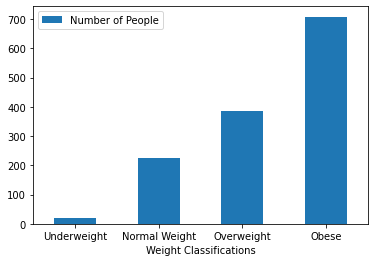

In [2]:
cursor.execute("""SELECT * ,
CASE
    WHEN bmi <= 18.499 THEN 'Underweight'
    WHEN bmi BETWEEN 18.5 AND 24.999 THEN 'Normal weight'
    WHEN bmi BETWEEN 25 AND 29.999 THEN 'Overweight'
    WHEN bmi >= 30 THEN 'Obesity'
END AS weight
FROM insurance_costs
ORDER BY charges DESC;""")
weight_class = cursor.fetchall()

obese = 0
overweight = 0
normal_weight = 0
underweight = 0

for row in weight_class:
    if row[7] == 'Obesity':
        obese+=1
    elif row[7] == 'Overweight':
        overweight+=1
    elif row[7] == 'Normal weight':
        normal_weight+=1
    elif row[7] == 'Underweight':
        underweight+=1

df = pd.DataFrame({'Weight Classifications':['Underweight', 'Normal Weight', 'Overweight', 'Obese'], 'Number of People':[underweight, normal_weight, overweight, obese]})
ax = df.plot.bar(x='Weight Classifications', y='Number of People', rot=0)


#### Step 3.
Use SQL to calculate the average insurance costs for men and women, use python to print those costs and to calculate the difference between men and women's costs. 

In [32]:
cursor.execute("""SELECT AVG(charges)
FROM insurance_costs
WHERE sex LIKE 'female'
AND smoker LIKE 'yes';""")
avg_female_costs = cursor.fetchone()

cursor.execute("""SELECT AVG(charges)
FROM insurance_costs
WHERE sex LIKE 'male'
AND smoker LIKE 'yes';""")
avg_male_costs = cursor.fetchone()

print("Female smokers pay on average ${} for health insurance, whereas male smokers pay on average ${}. ".format(round(avg_female_costs[0],2), round(avg_male_costs[0],2)))
      
print("On average, male smokers pay ${} more than female smokers for health insurance".format(round(avg_male_costs[0] - avg_female_costs[0],2)))


Female smokers pay on average $30679.0 for health insurance, whereas male smokers pay on average $33042.01. 
On average, male smokers pay $2363.01 more than female smokers for health insurance


#### Step 4.
Use SQL to find how many men and women pay more than the average for health insurance. 

In [23]:
cursor.execute("""SELECT count(sex), sex
FROM insurance_costs
WHERE charges >= 13270.4222651413
GROUP BY sex;""")
overpayers = cursor.fetchall()
male_overpayer = overpayers[1][0]
female_overpayer = overpayers[0][0]

print("{} females pay more for insurance than the overall average, while {} men pay more than the average. ".format(female_overpayer, male_overpayer))
 

In [40]:
cursor.execute("""SELECT *, avg(charges)
FROM insurance_costs""")
cursor.fetchone()

('age',
 'sex',
 'bmi',
 'children',
 'smoker',
 'region',
 'charges',
 13260.511568901418)

In [ ]:
conn.close()